In [3]:
import pandas as pd

# load cleaned data (created by ETL)
df = pd.read_csv(r"C:\voice assitant\ipl analysis 2025\data\ipl_players_cleaned.csv")

# quick peek
print("Rows, cols:", df.shape)
display(df.head(8))
display(df.info())
display(df.isna().sum())


Rows, cols: (157, 14)


,Player,Team,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,POS\tPlayer\tRuns\tMat\tInns\tNO\tHS\tAvg\tBF\...,Unknown,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sai Sudharsan,GT,759,15.0,15.0,1.0,108.0,54.21,486.0,156.17,1.0,6.0,88.0,21.0
2,Surya Kumar Yadav,MI,717,16.0,16.0,5.0,73.0,65.18,427.0,167.91,0.0,5.0,69.0,38.0
3,Virat Kohli,RCB,657,15.0,15.0,3.0,73.0,54.75,454.0,144.71,0.0,8.0,66.0,19.0
4,Shubman Gill,GT,650,15.0,15.0,2.0,93.0,50.00,417.0,155.87,0.0,6.0,62.0,24.0
5,Mitchell Marsh,LSG,627,13.0,13.0,0.0,117.0,48.23,383.0,163.70,1.0,6.0,56.0,37.0
6,Shreyas Iyer,PBKS,604,17.0,17.0,5.0,97.0,50.33,345.0,175.07,0.0,6.0,43.0,39.0
7,Yashasvi Jaiswal,RR,559,14.0,14.0,1.0,75.0,43.00,350.0,159.71,0.0,6.0,60.0,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  157 non-null    object 
 1   Team    157 non-null    object 
 2   Runs    157 non-null    int64  
 3   Mat     156 non-null    float64
 4   Inns    156 non-null    float64
 5   NO      156 non-null    float64
 6   HS      156 non-null    float64
 7   Avg     156 non-null    object 
 8   BF      156 non-null    float64
 9   SR      156 non-null    float64
 10  100     156 non-null    float64
 11  50      156 non-null    float64
 12  4s      156 non-null    float64
 13  6s      156 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 17.3+ KB


None

Player    0
Team      0
Runs      0
Mat       1
Inns      1
NO        1
HS        1
Avg       1
BF        1
SR        1
100       1
50        1
4s        1
6s        1
dtype: int64

In [4]:
# Drop the unwanted first row (index 0)
df = df.drop(index=0).reset_index(drop=True)

# Save the corrected dataset back to the cleaned file
df.to_csv(r"C:\voice assitant\ipl analysis 2025\data\ipl_players_cleaned.csv", index=False)

print("✅ Removed first unwanted row and saved cleaned CSV.")
print("Rows, cols after cleaning:", df.shape)
df.head()


✅ Removed first unwanted row and saved cleaned CSV.
Rows, cols after cleaning: (156, 14)


,Player,Team,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,Sai Sudharsan,GT,759,15.0,15.0,1.0,108.0,54.21,486.0,156.17,1.0,6.0,88.0,21.0
1,Surya Kumar Yadav,MI,717,16.0,16.0,5.0,73.0,65.18,427.0,167.91,0.0,5.0,69.0,38.0
2,Virat Kohli,RCB,657,15.0,15.0,3.0,73.0,54.75,454.0,144.71,0.0,8.0,66.0,19.0
3,Shubman Gill,GT,650,15.0,15.0,2.0,93.0,50.00,417.0,155.87,0.0,6.0,62.0,24.0
4,Mitchell Marsh,LSG,627,13.0,13.0,0.0,117.0,48.23,383.0,163.70,1.0,6.0,56.0,37.0


In [5]:
df.info()
df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  156 non-null    object 
 1   Team    156 non-null    object 
 2   Runs    156 non-null    int64  
 3   Mat     156 non-null    float64
 4   Inns    156 non-null    float64
 5   NO      156 non-null    float64
 6   HS      156 non-null    float64
 7   Avg     156 non-null    object 
 8   BF      156 non-null    float64
 9   SR      156 non-null    float64
 10  100     156 non-null    float64
 11  50      156 non-null    float64
 12  4s      156 non-null    float64
 13  6s      156 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 17.2+ KB


Player    0
Team      0
Runs      0
Mat       0
Inns      0
NO        0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [7]:
# Make a copy to work on
df_analysis = df.copy()

# Add new metrics
df_analysis["Runs_per_Match"] = (df_analysis["Runs"] / df_analysis["Mat"]).round(2)
df_analysis["Runs_per_Innings"] = (df_analysis["Runs"] / df_analysis["Inns"]).round(2)
df_analysis["Boundary_Runs"] = (df_analysis["4s"] * 4 + df_analysis["6s"] * 6)
df_analysis["Boundary_%"] = ((df_analysis["Boundary_Runs"] / df_analysis["Runs"]) * 100).round(2)

# Display first few rows
df_analysis.head(20)


,Player,Team,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,Runs_per_Match,Runs_per_Innings,Boundary_Runs,Boundary_%
0,Sai Sudharsan,GT,759,15.0,15.0,1.0,108.0,54.21,486.0,156.17,1.0,6.0,88.0,21.0,50.60,50.60,478.0,62.98
1,Surya Kumar Yadav,MI,717,16.0,16.0,5.0,73.0,65.18,427.0,167.91,0.0,5.0,69.0,38.0,44.81,44.81,504.0,70.29
2,Virat Kohli,RCB,657,15.0,15.0,3.0,73.0,54.75,454.0,144.71,0.0,8.0,66.0,19.0,43.80,43.80,378.0,57.53
3,Shubman Gill,GT,650,15.0,15.0,2.0,93.0,50.00,417.0,155.87,0.0,6.0,62.0,24.0,43.33,43.33,392.0,60.31
4,Mitchell Marsh,LSG,627,13.0,13.0,0.0,117.0,48.23,383.0,163.70,1.0,6.0,56.0,37.0,48.23,48.23,446.0,71.13
5,Shreyas Iyer,PBKS,604,17.0,17.0,5.0,97.0,50.33,345.0,175.07,0.0,6.0,43.0,39.0,35.53,35.53,406.0,67.22
6,Yashasvi Jaiswal,RR,559,14.0,14.0,1.0,75.0,43.00,350.0,159.71,0.0,6.0,60.0,28.0,39.93,39.93,408.0,72.99
7,Prabhsimran Singh,PBKS,549,17.0,17.0,0.0,91.0,32.29,342.0,160.52,0.0,4.0,56.0,30.0,32.29,32.29,404.0,73.59
8,K L Rahul,DC,539,13.0,13.0,3.0,112.0,53.90,360.0,149.72,1.0,3.0,52.0,21.0,41.46,41.46,334.0,61.97
9,Jos Buttler,GT,538,14.0,13.0,4.0,97.0,59.78,330.0,163.03,0.0,5.0,52.0,24.0,38.43,41.38,352.0,65.43


In [8]:
df_analysis.to_csv(r"C:\voice assitant\ipl analysis 2025/data/ipl_players_enriched.csv", index=False)
print("✅ Saved enriched dataset to C:\voice assitant\ipl analysis 2025/data/ipl_players_enriched.csv")


✅ Saved enriched dataset to C:oice assitant\ipl analysis 2025/data/ipl_players_enriched.csv


In [12]:
top_rpm = df_analysis.sort_values("Runs_per_Match", ascending=False).head(25)
top_rpm[["Player", "Team", "Runs", "Mat", "Runs_per_Match"]]


,Player,Team,Runs,Mat,Runs_per_Match
0,Sai Sudharsan,GT,759,15.0,50.60
4,Mitchell Marsh,LSG,627,13.0,48.23
1,Surya Kumar Yadav,MI,717,16.0,44.81
2,Virat Kohli,RCB,657,15.0,43.80
3,Shubman Gill,GT,650,15.0,43.33
80,Jonny Bairstow,MI,85,2.0,42.50
8,K L Rahul,DC,539,13.0,41.46
6,Yashasvi Jaiswal,RR,559,14.0,39.93
9,Jos Buttler,GT,538,14.0,38.43
47,Dewald Brevis,CSK,225,6.0,37.50


In [13]:
top_boundary = df_analysis.sort_values("Boundary_%", ascending=False).head(25)
top_boundary[["Player", "Team", "Runs", "Boundary_Runs", "Boundary_%"]]


,Player,Team,Runs,Boundary_Runs,Boundary_%
124,Kwena Maphaka,RR,8,8.0,100.00
129,Akash Deep,LSG,6,6.0,100.00
137,Lockie Ferguson,PBKS,4,4.0,100.00
113,Atharva Taide,SRH,13,12.0,92.31
114,Ravi Bishnoi,LSG,13,12.0,92.31
59,Andre Russell,KKR,167,148.0,88.62
84,Romario Shepherd,RCB,70,62.0,88.57
42,Sunil Narine,KKR,246,214.0,86.99
39,Vaibhav Suryavanshi,RR,252,216.0,85.71
103,Avesh Khan,LSG,21,18.0,85.71


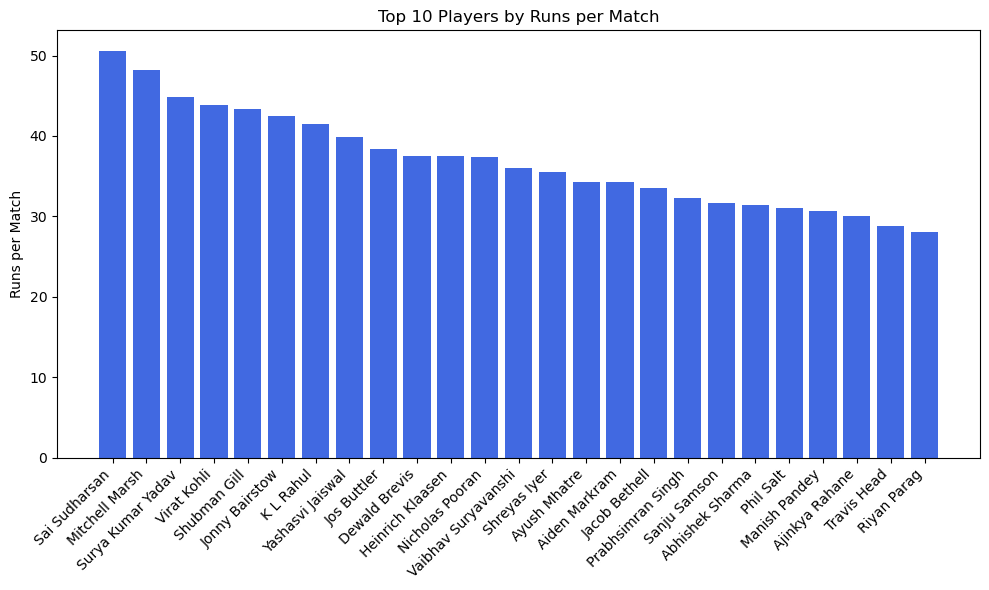

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_rpm["Player"], top_rpm["Runs_per_Match"], color="royalblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Players by Runs per Match")
plt.ylabel("Runs per Match")
plt.tight_layout()
plt.savefig(r"C:\voice assitant\ipl analysis 2025\dashboards\top10_runs_per_match.png")
plt.show()


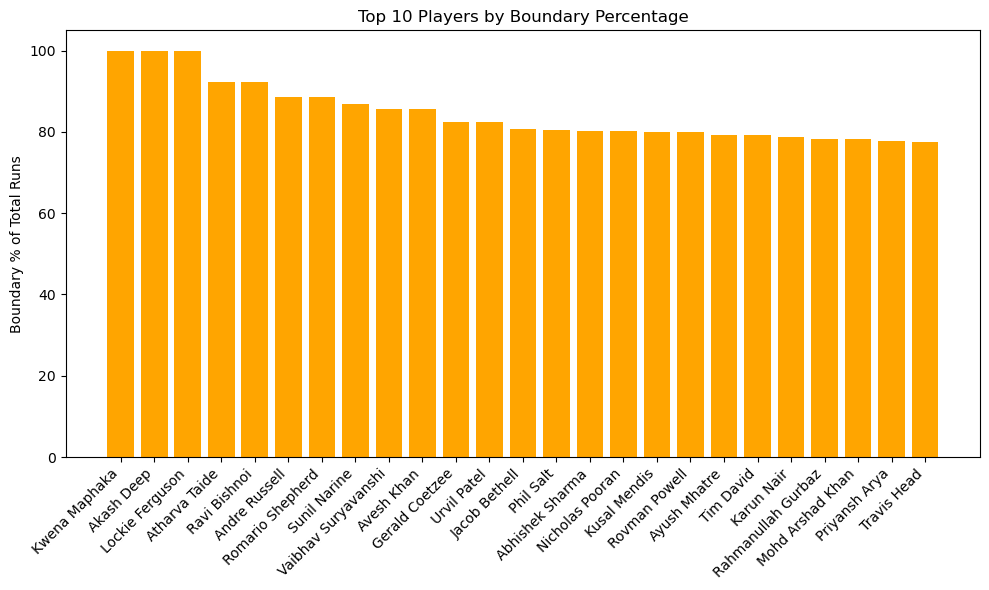

In [16]:
plt.figure(figsize=(10,6))
plt.bar(top_boundary["Player"], top_boundary["Boundary_%"], color="orange")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Players by Boundary Percentage")
plt.ylabel("Boundary % of Total Runs")
plt.tight_layout()
plt.savefig("r"C:\voice assitant\ipl analysis 2025\dashboards\top10_boundary_percent.png")
plt.show()


In [17]:
summary = df_analysis[["Player","Team","Runs","Mat","Inns","SR","100","50",
                        "4s","6s","Runs_per_Match","Runs_per_Innings","Boundary_%"]]
summary.to_csv(r"C:\voice assitant\ipl analysis 2025\data\ipl_dashboard_summary.csv", index=False)
print("✅ Dashboard summary exported to ../data/ipl_dashboard_summary.csv")


✅ Dashboard summary exported to ../data/ipl_dashboard_summary.csv
